Analysis of the features (in drawing board notebook) shows that Overall Quality feature is an important feature that we can use to normalize other continuous features. The resultant normalized features often show very good linear relationship with the Sales Price. In this simple model we use only continous features and ignore all of the discrete features except for Overall Quality. In future models we can use some of the discrete features to categorize houses into different groups and assign each group with a more refined pricing model. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as scop

In [2]:
trainset = pd.read_csv('train.csv', index_col = 'Id')
testset = pd.read_csv('test.csv', index_col = 'Id')

The figures below shows that houses with higher overall quality (color closer to yellow) has higher prices for a given lot area. There are other continous features show similar patterns. These patterns suggest that overall quality is an important factor to nomalize some continous features. The resultant normalized features usually have improved linear relationship with the sales price.

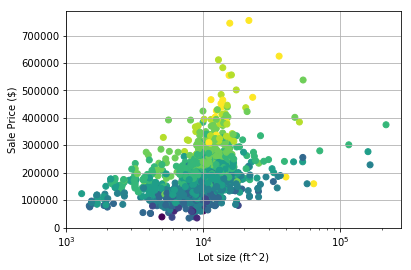

In [3]:
fig = plt.figure
ax = plt.gca()
ax.scatter(trainset.LotArea, trainset.SalePrice, c = trainset.OverallQual)
ax.set_xscale('log')
plt.xlabel('Lot size (ft^2)')
plt.ylabel('Sale Price ($)')
plt.grid()
plt.show()

In [4]:
a = trainset.groupby('OverallQual').SalePrice.agg('mean')
oqmap = a / a.loc[5]

The map above calculates the influence of OverallQual on the sales price. This map is based on known sales price therefore could be overfitting the training set. A less variant model would be using a log linear relationship between overall quality and sales price as the figure below suggests. For now we use the oqmap function above.

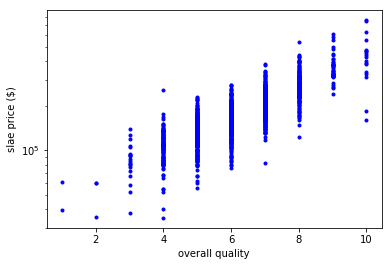

In [5]:
plt.semilogy(trainset.OverallQual, trainset.SalePrice, '.b')
plt.xlabel('overall quality')
plt.ylabel('slae price ($)')
plt.show()

In [6]:
trainset = trainset.assign(LotArea_Q = np.log(trainset.LotArea) * trainset.OverallQual.map(oqmap))
trainset = trainset.assign(LogLotArea = np.log(trainset.LotArea))
trainset[['LotArea', 'LogLotArea', 'LotArea_Q', 'SalePrice']].corr()

,LotArea,LogLotArea,LotArea_Q,SalePrice
LotArea,1.000000,0.697945,0.215848,0.263843
LogLotArea,0.697945,1.000000,0.335918,0.388520
LotArea_Q,0.215848,0.335918,1.000000,0.851368
SalePrice,0.263843,0.388520,0.851368,1.000000


The table above shows that when normalized the linear relationship greatly improves. The reason could be that overall quality represents the factors that are not related to lot area. When those factors are taken out we are essentially comparing houses under the same condition but with different lot area. The normalization distilled the more simple intuitive relationship between lot area and sale price that we see in the figure below.

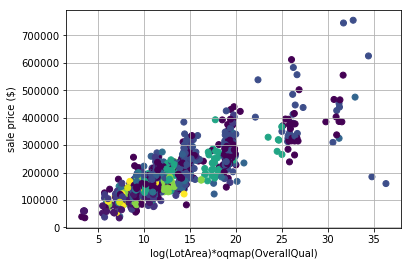

In [7]:
fig = plt.figure
ax = plt.gca()
ax.scatter(trainset.LotArea_Q, trainset.SalePrice, c = trainset.MSSubClass)
plt.xlabel('log(LotArea)*oqmap(OverallQual)')
plt.ylabel('sale price ($)')
plt.grid()
plt.show()

The figure above also shows an example that other discrete features (in this case MSSubClass) can help us further refine the relationships between normalized continous features and the sales price. A refined model would consist of a classification model that puts a house into a specific category and each category has its own regression model (maybe linear). The regression model is each category has reduced error than a general regression model with all houses.

In this model we consider only linear regression over all houses and the refinement discussed above will be investigated in the future.

Below we create a few more normalized continous features that is based on the overall quality. In addition we add the logarithmic of OverallQual as a continous feature. We also added a feature TotBR represent the total number of bathrooms. It is a feature that is naturally ordered and has a good linear relationship with sales price.

In [8]:
trainset = trainset.assign(FFSF_Q = trainset['1stFlrSF'] * trainset.OverallQual.map(oqmap))
trainset = trainset.assign(GLA_Q = trainset.GrLivArea * trainset.OverallQual.map(oqmap))
trainset = trainset.assign(PosOutSF = trainset.WoodDeckSF + trainset.OpenPorchSF + trainset.ScreenPorch)
trainset = trainset.assign(POSF_Q = trainset.PosOutSF * trainset.OverallQual.map(oqmap))
trainset = trainset.assign(LogQ = trainset.OverallQual.apply(np.log))

trainset = trainset.assign(TotBR = trainset.BsmtFullBath + trainset.BsmtHalfBath * 0.5 + trainset.FullBath + trainset.HalfBath * 0.5)

In [9]:
contset = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FFSF_Q',
           'LotArea_Q', 'GLA_Q', 'TotBR', 'Fireplaces', 'GarageCars', 'POSF_Q','LogQ', 'SalePrice']
trainset[contset].corr()

,LotFrontage,LotArea,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,FFSF_Q,LotArea_Q,GLA_Q,TotBR,Fireplaces,GarageCars,POSF_Q,LogQ,SalePrice
LotFrontage,1.000000,0.426095,0.193458,0.392075,0.457181,0.080177,0.416649,0.359309,0.400998,0.220092,0.266639,0.285691,0.237748,0.230435,0.351799
LotArea,0.426095,1.000000,0.104160,0.260833,0.299475,0.050986,0.226289,0.215848,0.216391,0.204764,0.271364,0.154871,0.197817,0.097750,0.263843
MasVnrArea,0.193458,0.104160,1.000000,0.363936,0.344501,0.174561,0.465630,0.452811,0.485121,0.319557,0.249070,0.364204,0.347806,0.374281,0.477493
TotalBsmtSF,0.392075,0.260833,0.363936,1.000000,0.819530,-0.174512,0.788815,0.599942,0.579591,0.414468,0.339519,0.434585,0.474575,0.504216,0.613581
1stFlrSF,0.457181,0.299475,0.344501,0.819530,1.000000,-0.202646,0.830897,0.565636,0.598228,0.390557,0.410531,0.439317,0.456603,0.437098,0.605852
2ndFlrSF,0.080177,0.050986,0.174561,-0.174512,-0.202646,1.000000,0.031611,0.262289,0.490218,0.375160,0.194561,0.183926,0.215624,0.292110,0.319334
FFSF_Q,0.416649,0.226289,0.465630,0.788815,0.830897,0.031611,1.000000,0.885672,0.867546,0.473020,0.411636,0.537132,0.658076,0.697657,0.793815
LotArea_Q,0.359309,0.215848,0.452811,0.599942,0.565636,0.262289,0.885672,1.000000,0.897974,0.525137,0.407133,0.597824,0.686783,0.865553,0.851368
GLA_Q,0.400998,0.216391,0.485121,0.579591,0.598228,0.490218,0.867546,0.897974,1.000000,0.567686,0.434253,0.539791,0.676252,0.731183,0.837414
TotBR,0.220092,0.204764,0.319557,0.414468,0.390557,0.375160,0.473020,0.525137,0.567686,1.000000,0.331652,0.483578,0.439799,0.521937,0.631731


The feature LotFrontage and MasVnrArea have decent correlation coefficients with sales price. However, both features have a few null values in the training set. In the MasVnrArea the null values are in the houses without masonary vaneer so they can be filled by 0.0. 

We can use other features to estimate the missing values in LotFrontage. The table above shows that LotFrontage and a number of features has decent correlation coefficients (higher than 0.2).

In [10]:
trainset.MasVnrArea.fillna(0.0, inplace = True)

Model 1: estimating Lot Frontage

In [11]:
def lrCost(theta, X, y):
    """linear regression cost function """
    m = X.shape[0]
    return np.dot((np.dot(X, theta) - y).T, np.dot(X, theta) - y) / 2.0 / m

def lrGradient(theta, X, y):
    """ linear regression gradient """
    return np.dot(X.T, np.dot(X, theta) - y) / X.shape[0]

contset.remove('SalePrice')
ind = trainset.LotFrontage.notnull()
X = np.concatenate((np.ones(shape = (trainset.shape[0], 1)), 
                    trainset[contset[1:]].values.reshape(trainset.shape[0], len(contset) - 1)), axis = 1)
theta0 = np.zeros(shape = (1, len(contset)))
w = scop.fmin_l_bfgs_b(lrCost, theta0, lrGradient, (X[ind, :], trainset.LotFrontage.values[ind]))
w

C:\Users\theya\Anaconda2\lib\site-packages\ipykernel\__main__.py:15: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


(array([  5.40172899e-07,   7.96236357e-03,  -4.73246899e-04,
          1.66199535e-03,   1.66199535e-03,  -2.06200434e-03,
          1.29772058e-03,  -1.17215088e-06,  -1.91005107e-03,
         -1.06409275e-06,   2.95469789e-06,   1.08034580e-06,
          8.36543315e-04,   5.95659238e-07]),
 1.0097419586828951e-28,
 {'funcalls': 8,
  'grad': array([  9.16892133e-15,   9.09207565e-11,  -4.94109472e-13,
           1.25946912e-11,   1.25946912e-11,  -2.15290556e-12,
           1.44981048e-11,   9.42726821e-14,   1.11489220e-11,
           2.04013366e-14,   1.16898880e-14,   1.83378427e-14,
           3.97696051e-12,   1.60398929e-14]),
  'nit': 3,
  'task': 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL',
  'warnflag': 0})

In [12]:
lotfront_para = w[0]
lotfrontage_predict = np.dot(X, lotfront_para.T)
ind = trainset.LotFrontage.isnull()
trainset.LotFrontage[ind] = lotfront_para[ind]

C:\Users\theya\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Users\theya\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


We filled the missing LotFrontage values from the model above. Next we build a linear regression model between the continous features and the sales price. We remove sales price from the feature list for obvious reasons. We also remove LotArea and instead using LogLotArea since the latter has better linear relationship with sales price.

Model 2: Sales Price model

In [13]:
contset.remove('LotArea')
contset.append('LogLotArea')

In [14]:
X = np.concatenate((np.ones(shape = (trainset.shape[0], 1)), trainset[contset].values.reshape(trainset.shape[0], len(contset))), axis = 1)
theta0 = np.zeros(shape = (1, len(contset) + 1))
w = scop.fmin_l_bfgs_b(lrCost, theta0, lrGradient, (X, trainset.SalePrice.values))
w

(array([ -1.24883663e+04,  -4.93581209e+01,   2.25868737e+01,
          1.85343492e+01,   4.84428662e+01,   1.63739395e+01,
         -2.23078555e+01,   1.21138339e+04,   5.49194889e+00,
          1.28092456e+04,   6.20480609e+03,   1.24967318e+04,
          1.07804182e+01,  -3.92693174e+04,   6.42887535e+01]),
 561464052.65125704,
 {'funcalls': 1467,
  'grad': array([   42.35360841,  -278.28024839,  -456.87119629, -1105.88833641,
         -1245.50883893,  -281.79405356, -1933.79704006,   340.65292909,
         -2846.25407888,  -259.18078066,  -109.51519165,   -49.0765471 ,
           344.42076048,    46.103245  ,   406.69181388]),
  'nit': 1280,
  'task': 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
  'warnflag': 0})

Below we estimate the relative error of the model over the training set. The relative error is define as:

$err(y, y_0) = \frac{|y - y_0|}{y_0}$, 

where $y_0$ is the known sales price and $y$ is the predicted sales price.

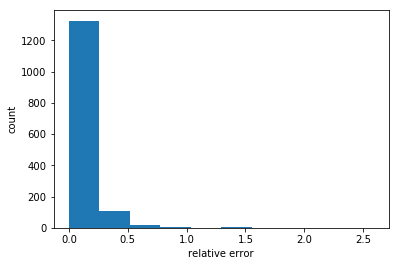

In [15]:
sp_predict = np.dot(X, w[0].T)
err = np.abs(sp_predict - trainset.SalePrice.values) / trainset.SalePrice.values
plt.hist(err)
plt.xlabel('relative error')
plt.ylabel('count')
plt.show()

In [16]:
np.sqrt(np.dot((np.log(sp_predict) - np.log(trainset.SalePrice.values)).T, np.log(sp_predict) - np.log(trainset.SalePrice.values)) / sp_predict.size)

0.16228493767104593

The figure above shows that most of the price predictions has a relative error less than 0.5%. This is not a bad model. We use the model parameters to estimate the sale prices for the test set hosues.

First we filling the null values in different features. For LotFrontage we use the same method shown above. For the MasVnrArea,  BsmtFullBath and BsmtHalfBath we use 0 to fill the null values since in all three cases the null value represent no corresponding feature present in the house as shown below. 

In [17]:
nullpercent = testset.isnull().sum() / testset.shape[0]
nullpercent[nullpercent.values > 0]

MSZoning        0.002742
LotFrontage     0.155586
Alley           0.926662
Utilities       0.001371
Exterior1st     0.000685
Exterior2nd     0.000685
MasVnrType      0.010966
MasVnrArea      0.010281
BsmtQual        0.030158
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtFinType1    0.028787
BsmtFinSF1      0.000685
BsmtFinType2    0.028787
BsmtFinSF2      0.000685
BsmtUnfSF       0.000685
TotalBsmtSF     0.000685
BsmtFullBath    0.001371
BsmtHalfBath    0.001371
KitchenQual     0.000685
Functional      0.001371
FireplaceQu     0.500343
GarageType      0.052090
GarageYrBlt     0.053461
GarageFinish    0.053461
GarageCars      0.000685
GarageArea      0.000685
GarageQual      0.053461
GarageCond      0.053461
PoolQC          0.997944
Fence           0.801234
MiscFeature     0.965045
SaleType        0.000685
dtype: float64

In [18]:
testset[testset.MasVnrArea.isnull()].MasVnrType

Id
1692    NaN
1707    NaN
1883    NaN
1993    NaN
2005    NaN
2042    NaN
2312    NaN
2326    NaN
2341    NaN
2350    NaN
2369    NaN
2593    NaN
2658    NaN
2687    NaN
2863    NaN
Name: MasVnrType, dtype: object

In [19]:
testset[testset.BsmtFullBath.isnull()].BsmtQual

Id
2121    NaN
2189    NaN
Name: BsmtQual, dtype: object

In [20]:
testset[testset.GarageCars.isnull()].GarageType

Id
2577    Detchd
Name: GarageType, dtype: object

One house is missing GarageCars feature and this house has a detached style garage. We use the mean value for GarageCars for this garage type in training set to fill this missing value.

In [21]:
trainset.groupby('GarageType').GarageCars.agg(['mean', 'count', 'min', 'max'])

,mean,count,min,max
GarageType,,,,
2Types,3.000000,6,2,4
Attchd,1.964368,870,1,4
Basment,1.578947,19,1,2
BuiltIn,2.250000,88,1,3
CarPort,1.666667,9,1,2
Detchd,1.576227,387,1,4


In [22]:
testset.MasVnrArea.fillna(0.0, inplace = True)
testset.BsmtFullBath.fillna(0, inplace = True)
testset.BsmtHalfBath.fillna(0, inplace = True)
testset.TotalBsmtSF.fillna(0.0, inplace = True)
testset.GarageCars.fillna(1.6, inplace = True)

In [23]:
testset = testset.assign(LotArea_Q = np.log(testset.LotArea) * testset.OverallQual.map(oqmap))
testset = testset.assign(LogLotArea = np.log(testset.LotArea))
testset = testset.assign(FFSF_Q = testset['1stFlrSF'] * testset.OverallQual.map(oqmap))
testset = testset.assign(GLA_Q = testset.GrLivArea * testset.OverallQual.map(oqmap))
testset = testset.assign(PosOutSF = testset.WoodDeckSF + testset.OpenPorchSF + testset.ScreenPorch)
testset = testset.assign(POSF_Q = testset.PosOutSF * testset.OverallQual.map(oqmap))
testset = testset.assign(LogQ = testset.OverallQual.apply(np.log))

testset = testset.assign(TotBR = testset.BsmtFullBath + testset.BsmtHalfBath * 0.5 + testset.FullBath + testset.HalfBath * 0.5)

Now we fill the missing LotFrontage values using the model established with the training set data. 

In [24]:
contset = ['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'FFSF_Q',
           'LotArea_Q', 'GLA_Q', 'TotBR', 'Fireplaces', 'GarageCars', 'POSF_Q','LogQ']

X = np.concatenate((np.ones(shape = (testset.shape[0], 1)), 
                    testset[contset[1:]].values.reshape(testset.shape[0], len(contset) - 1)), axis = 1)
lotfrontage_predict = np.dot(X, lotfront_para.T)
ind = testset.LotFrontage.isnull()
testset.LotFrontage[ind] = lotfront_para[ind]

C:\Users\theya\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index
C:\Users\theya\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [25]:
contset.remove('LotArea')
contset.append('LogLotArea')

Below we use the model we established with the training set to estimate the sale prices for the houses in the test set.

In [26]:
X = np.concatenate((np.ones(shape = (testset.shape[0], 1)), 
                    testset[contset].values.reshape(testset.shape[0], len(contset))), axis = 1)
test_SalePrice = np.dot(X, w[0].T)

In [27]:
testset = testset.assign(SalePrice = test_SalePrice)
testset.to_csv('houseprice_v1.csv', columns = ['SalePrice'], index = True)

After submitting the results we got a mean squat root error for the logarithmic of the sales price of 0.175.